In [1]:
import pandas as pd
import matplotlib as plt
soil_df = pd.read_csv('df_soil_mean_loc.csv')

In [2]:
# bin lead and arsenic 
# Source: http://www.austintexas.gov/page/soil-kitchen-results
soil_df['Lead_Bin'] = pd.cut(soil_df['Lead'], bins=[-1, 3, 500, 2000], labels=["Low", "Mid", "High"])
soil_df['Arsenic_Bin'] = pd.cut(soil_df['Arsenic'], bins=[-1, 5, 24, 100], labels=["Low", "Mid", "High"])

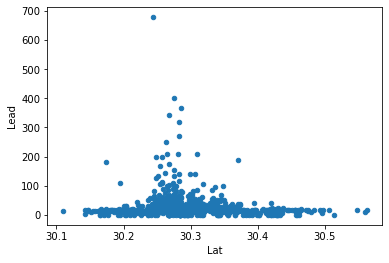

In [3]:
soil_df.plot(x='Lat', y='Lead', kind='scatter')

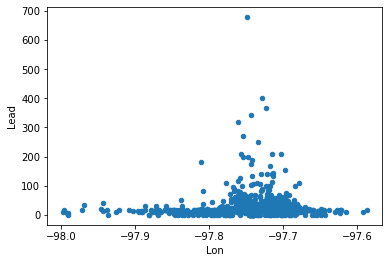

In [4]:
soil_df.plot(x='Lon', y='Lead', kind='scatter')

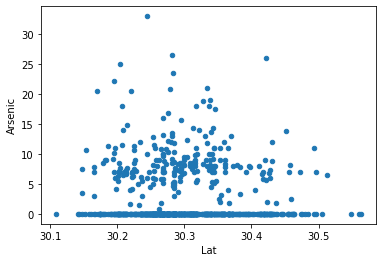

In [5]:
soil_df.plot(x='Lat', y='Arsenic', kind='scatter')

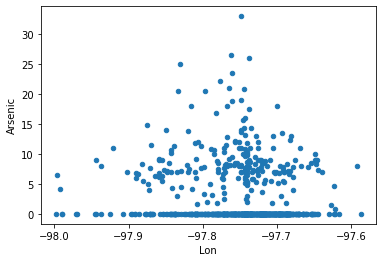

In [6]:
soil_df.plot(x='Lon', y='Arsenic', kind='scatter')

In [7]:
soil_df.describe()

,Unnamed: 0,Lead,Arsenic,Lat,Lon
count,847.000000,847.000000,847.000000,847.000000,847.000000
mean,423.000000,27.216094,2.385090,30.297183,-97.746490
std,244.652134,44.246050,4.630102,0.070419,0.058551
min,0.000000,0.000000,0.000000,30.109070,-97.997680
25%,211.500000,11.700000,0.000000,30.255920,-97.769235
50%,423.000000,16.000000,0.000000,30.284160,-97.740610
75%,634.500000,25.206667,3.387500,30.338545,-97.710975
max,846.000000,678.000000,33.000000,30.562580,-97.586850


In [8]:
soil_df['Lead_Standardized'] = (soil_df['Lead']-soil_df['Lead'].mean())/soil_df['Lead'].std()
soil_df['Arsenic_Standardized'] = (soil_df['Arsenic']-soil_df['Arsenic'].mean())/soil_df['Arsenic'].std()

In [9]:
soil_df.head()

,Unnamed: 0,Intersection,Lead,Arsenic,Lat,Lon,Lead_Bin,Arsenic_Bin,Lead_Standardized,Arsenic_Standardized
0,0,10th @ Menden,24.00,0.00,30.27069,-97.73753,Mid,Low,-0.072687,-0.515127
1,1,10th @ Prospect -- Back,98.00,0.00,30.26427,-97.71782,Mid,Low,1.599779,-0.515127
2,2,10th @ Prospect -- Front,51.00,0.00,30.26427,-97.71782,Mid,Low,0.537537,-0.515127
3,3,10th St.@Theresa Ave,62.00,9.11,30.28143,-97.76490,Mid,Mid,0.786147,1.452432
4,4,10th@Northwestern,19.37,0.00,30.26604,-97.71402,Mid,Low,-0.177329,-0.515127


In [10]:
# Based on https://towardsdatascience.com/choosing-a-scikit-learn-linear-regression-algorithm-dd96b48105f5 
# I am going to try Lasso, Elastic Net, SVR and GaussianProcessRegressor and see which one has the best fit. ?

In [11]:
# Test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(soil_df[['Lat', 'Lon']], soil_df['Lead'], random_state=13)

In [13]:
from sklearn import linear_model
lead_lasso = linear_model.Lasso(alpha=0.1)
lead_lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
lead_lasso.score(X_test, y_test)

0.007484077249202192

In [14]:
lead_elastic = linear_model.ElasticNet(random_state=0)
lead_elastic.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
lead_elastic.score(X_test, y_test)

-0.004742770702125476

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
lead_gaussian = GaussianProcessRegressor(kernel=kernel,random_state=0)
lead_gaussian.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=0)

In [21]:
lead_gaussian.score(X_test, y_test)

-0.004755522817571967

In [16]:
from sklearn.svm import SVR
lead_svr = SVR(C=1.0, epsilon=0.2)
lead_svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
lead_svr.score(X_test, y_test)

-0.029939935765956882